In [1]:
ls

Eldrich.ipynb                        data/
Kedo_Home_Sale_Price_Analysis.ipynb  index.html
README.md


In [2]:
cd data

/Users/alexiskedo/Documents/Data Science/Projects/Phase 2 Project/Seattle-Home-Sales-Dataset-Analysis/data


In [3]:
ls

Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson
column_names.md
kc_house_data.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
import pylab
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv('kc_house_data.csv')

### Cleaning Data, Identifying & Removing Outliers

In [6]:
df.head()
#First look at the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()
#Looking at initial characteristics of columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,534.00","21,597.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00","1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00","1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00","1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


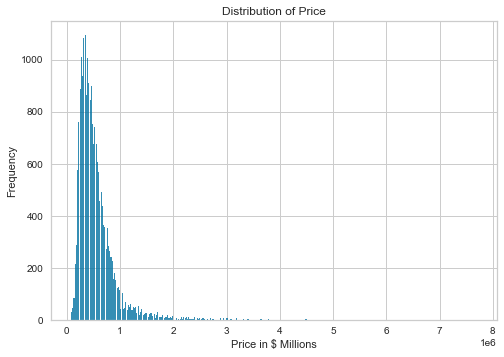

In [9]:
plt.hist(x = df.price, bins = 'auto', alpha = 0.80, rwidth= .85)
plt.xlabel('Price in $ Millions')
plt.ylabel('Frequency')
plt.title('Distribution of Price');

In [10]:
to_drop = ['id', 'view', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'date' ]

In [11]:
df.drop(to_drop, axis = 1, inplace = True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,"221,900.00",3,1.00,1180,5650,1.00,nan,3,7,1955,0.00,98178
1,"538,000.00",3,2.25,2570,7242,2.00,0.00,3,7,1951,"1,991.00",98125
2,"180,000.00",2,1.00,770,10000,1.00,0.00,3,6,1933,nan,98028
3,"604,000.00",4,3.00,1960,5000,1.00,0.00,5,7,1965,0.00,98136
4,"510,000.00",3,2.00,1680,8080,1.00,0.00,3,8,1987,0.00,98074


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00"
mean,"540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,3.41,7.66,"1,971.00",83.64,"98,077.95"
std,"367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.65,1.17,29.38,399.95,53.51
min,"78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,"1,900.00",0.00,"98,001.00"
25%,"322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,3.00,7.00,"1,951.00",0.00,"98,033.00"
50%,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,3.00,7.00,"1,975.00",0.00,"98,065.00"
75%,"645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,4.00,8.00,"1,997.00",0.00,"98,118.00"
max,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,5.00,13.00,"2,015.00","2,015.00","98,199.00"


In [14]:
df_mean_median = pd.DataFrame(data = (df.median(), df.mean()), index = ['median', 'mean'])
# Creating a variable 'df_mean_median' which compares the median and mean of each column 
# in order to glimpse at skewness of each feature


In [15]:
df_mean_median

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
median,"450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,3.00,7.00,"1,975.00",0.00,"98,065.00"
mean,"540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,3.41,7.66,"1,971.00",83.64,"98,077.95"


In [16]:
# sqft_lot has a significant right skew (positive skew), with the mean double that of the median
# price has a slightly less significant postive skew, with the mean being around 120% that of the mdian  

In [17]:
df['waterfront'].value_counts()

0.00    19075
1.00      146
Name: waterfront, dtype: int64

In [18]:
df.loc[df['waterfront'].isna() == True]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,"221,900.00",3,1.00,1180,5650,1.00,nan,3,7,1955,0.00,98178
10,"662,500.00",3,2.50,3560,9796,1.00,nan,3,8,1965,0.00,98007
23,"252,700.00",2,1.50,1070,9643,1.00,nan,3,7,1985,nan,98030
40,"625,000.00",4,2.50,2570,5520,2.00,nan,3,9,2000,nan,98074
55,"885,000.00",4,2.50,2830,5000,2.00,nan,3,9,1995,0.00,98105
...,...,...,...,...,...,...,...,...,...,...,...,...
21578,"350,000.00",4,2.75,2500,5995,2.00,nan,3,8,2008,0.00,98042
21582,"541,800.00",4,2.50,3118,7866,2.00,nan,3,9,2014,0.00,98001
21586,"224,000.00",3,1.75,1500,11968,1.00,nan,3,6,2014,0.00,98010
21587,"507,250.00",3,2.50,2270,5536,2.00,nan,3,8,2003,0.00,98065


In [19]:
len(df.loc[df['waterfront'].isna() == True])

2376

In [20]:
df.waterfront.fillna(0.0, inplace = True)
# I replaced all the null values in the waterfront column with zero. I believe it is a safe assumption 
# that if a property is waterfront, real estate agents / homeowners would include it in the assessment 
# of the home

In [21]:
df.yr_renovated

0           0.00
1       1,991.00
2            nan
3           0.00
4           0.00
          ...   
21592       0.00
21593       0.00
21594       0.00
21595       0.00
21596       0.00
Name: yr_renovated, Length: 21597, dtype: float64

In [22]:
df.loc[df['yr_renovated'].isna() == True]
# Checking to see the number and location of the rows where value for column 'yr_renovated' is null.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
2,"180,000.00",2,1.00,770,10000,1.00,0.00,3,6,1933,nan,98028
12,"310,000.00",3,1.00,1430,19901,1.50,0.00,4,7,1927,nan,98028
23,"252,700.00",2,1.50,1070,9643,1.00,0.00,3,7,1985,nan,98030
26,"937,000.00",3,1.75,2450,2691,2.00,0.00,3,8,1915,nan,98119
28,"438,000.00",3,1.75,1520,6380,1.00,0.00,3,7,1948,nan,98115
...,...,...,...,...,...,...,...,...,...,...,...,...
21576,"475,000.00",3,2.25,1190,1200,3.00,0.00,3,8,2008,nan,98103
21577,"1,090,000.00",5,3.75,4170,8142,2.00,0.00,3,10,2006,nan,98056
21579,"520,000.00",2,2.25,1530,981,3.00,0.00,3,8,2006,nan,98103
21581,"1,580,000.00",4,3.25,3410,10125,2.00,0.00,3,10,2007,nan,98040


In [23]:
pd.unique(df.yr_renovated)
# Looking at the number of unique values in 'yr_renovated'. 
# The column is filled with categorical values with high cardinality 

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [24]:
df.yr_renovated.value_counts()
# Most of the houses have not been rennovated

0.00        17011
2,014.00       73
2,003.00       31
2,013.00       31
2,007.00       30
            ...  
1,946.00        1
1,959.00        1
1,971.00        1
1,951.00        1
1,954.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
df.loc[df.yr_renovated == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,"221,900.00",3,1.00,1180,5650,1.00,0.00,3,7,1955,0.00,98178
3,"604,000.00",4,3.00,1960,5000,1.00,0.00,5,7,1965,0.00,98136
4,"510,000.00",3,2.00,1680,8080,1.00,0.00,3,8,1987,0.00,98074
5,"1,230,000.00",4,4.50,5420,101930,1.00,0.00,3,11,2001,0.00,98053
6,"257,500.00",3,2.25,1715,6819,2.00,0.00,3,7,1995,0.00,98003
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.00",3,2.50,1530,1131,3.00,0.00,3,8,2009,0.00,98103
21593,"400,000.00",4,2.50,2310,5813,2.00,0.00,3,8,2014,0.00,98146
21594,"402,101.00",2,0.75,1020,1350,2.00,0.00,3,7,2009,0.00,98144
21595,"400,000.00",3,2.50,1600,2388,2.00,0.00,3,8,2004,0.00,98027


In [26]:
len(df.loc[df['yr_renovated'].isna() == True])

3842

In [27]:
len(df.yr_renovated)

21597

In [28]:
3842/21596
#17% of the data under column 'yr_renovated' contain null values. I will be replacing these with the number 0. 
#I will also change the column values to either 1 or 0, in order to ultimately display iterate through the data as
# binary. 

0.1779033154287831

In [29]:
21597 - (17011 + 3842) 
#744 houses have been renovated

744

In [30]:
df.yr_renovated.fillna(value = 0, inplace = True)

In [31]:
df.loc[(df.yr_renovated > 0), 'yr_renovated'] = 1

In [32]:
pd.unique(df.yr_renovated)

array([0., 1.])

In [33]:
df.yr_renovated.value_counts()

0.00    20853
1.00      744
Name: yr_renovated, dtype: int64

In [34]:
df['bedrooms'].value_counts()
# dropping the row where the bedroom count is at 33. The entry appears to be a mistake

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
15856,"640,000.00",33,1.75,1620,6000,1.00,0.00,5,7,1947,0.00,98103


In [36]:
bedroom_outlier = df.loc[df['bedrooms'] == 33].index
df.drop(bedroom_outlier, axis = 0,  inplace = True)

In [37]:
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode


In [38]:
df.loc[df.price == df.price.max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
7245,"7,700,000.00",6,8.00,12050,27600,2.50,0.00,4,13,1910,1.00,98102


In [39]:
price_outlier = df.loc[df['price'] == df.price.max()].index
df.drop(price_outlier, axis = 0,  inplace = True)
#dropped the outlier because it skewed the distribution of the column

In [40]:
df.loc[df.sqft_lot == df.sqft_lot.max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
1717,"700,000.00",4,1.00,1300,1651359,1.00,0.00,4,6,1920,0.00,98022


In [41]:
sqft_lot_outlier = df.loc[df['sqft_lot'] == df.sqft_lot.max()].index
df.drop(sqft_lot_outlier, axis = 0,  inplace = True)

In [42]:
df.loc[df.bathrooms == df.bathrooms.max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
12764,"2,280,000.00",7,8.00,13540,307752,3.00,0.00,3,12,1999,0.00,98053


In [43]:
bathrooms_outlier = df.loc[df['bathrooms'] == df.bathrooms.max()].index
df.drop(bathrooms_outlier, axis = 0,  inplace = True)

In [44]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
count,"21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00","21,593.00"
mean,"539,872.42",3.37,2.12,"2,079.39","15,009.92",1.49,0.01,3.41,7.66,"1,971.00",0.03,"98,077.95"
std,"363,961.91",0.90,0.77,912.33,"39,841.45",0.54,0.08,0.65,1.17,29.37,0.18,53.52
min,"78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,"1,900.00",0.00,"98,001.00"
25%,"322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,3.00,7.00,"1,951.00",0.00,"98,033.00"
50%,"450,000.00",3.00,2.25,"1,910.00","7,617.00",1.50,0.00,3.00,7.00,"1,975.00",0.00,"98,065.00"
75%,"645,000.00",4.00,2.50,"2,550.00","10,682.00",2.00,0.00,4.00,8.00,"1,997.00",0.00,"98,118.00"
max,"7,060,000.00",11.00,7.75,"10,040.00","1,164,794.00",3.50,1.00,5.00,13.00,"2,015.00",1.00,"98,199.00"


In [45]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
dtype: int64

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,"221,900.00",3,1.00,1180,5650,1.00,0.00,3,7,1955,0.00,98178
1,"538,000.00",3,2.25,2570,7242,2.00,0.00,3,7,1951,1.00,98125
2,"180,000.00",2,1.00,770,10000,1.00,0.00,3,6,1933,0.00,98028
3,"604,000.00",4,3.00,1960,5000,1.00,0.00,5,7,1965,0.00,98136
4,"510,000.00",3,2.00,1680,8080,1.00,0.00,3,8,1987,0.00,98074


## Initial Visualizations of Data 

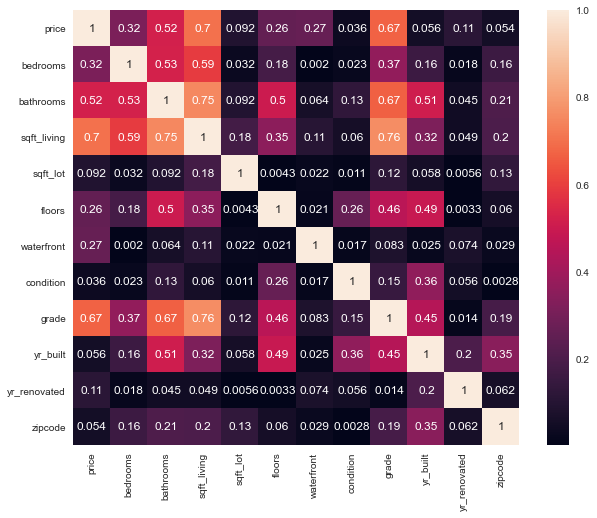

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().abs(), annot=True)
plt.show();

Columns 'bathrooms', 'sqft_living', and 'grade' appear to be the best indicators of price. However, it may be that 'bathrooms' and 'sqft_living' possess a multicollinearity issue. Will assess later. Also surprisingly, the number of bedrooms does not initially show high correlation. I am dropping zipcode for the numbers in a zipcode does not indicate numerical relationship with one another. 

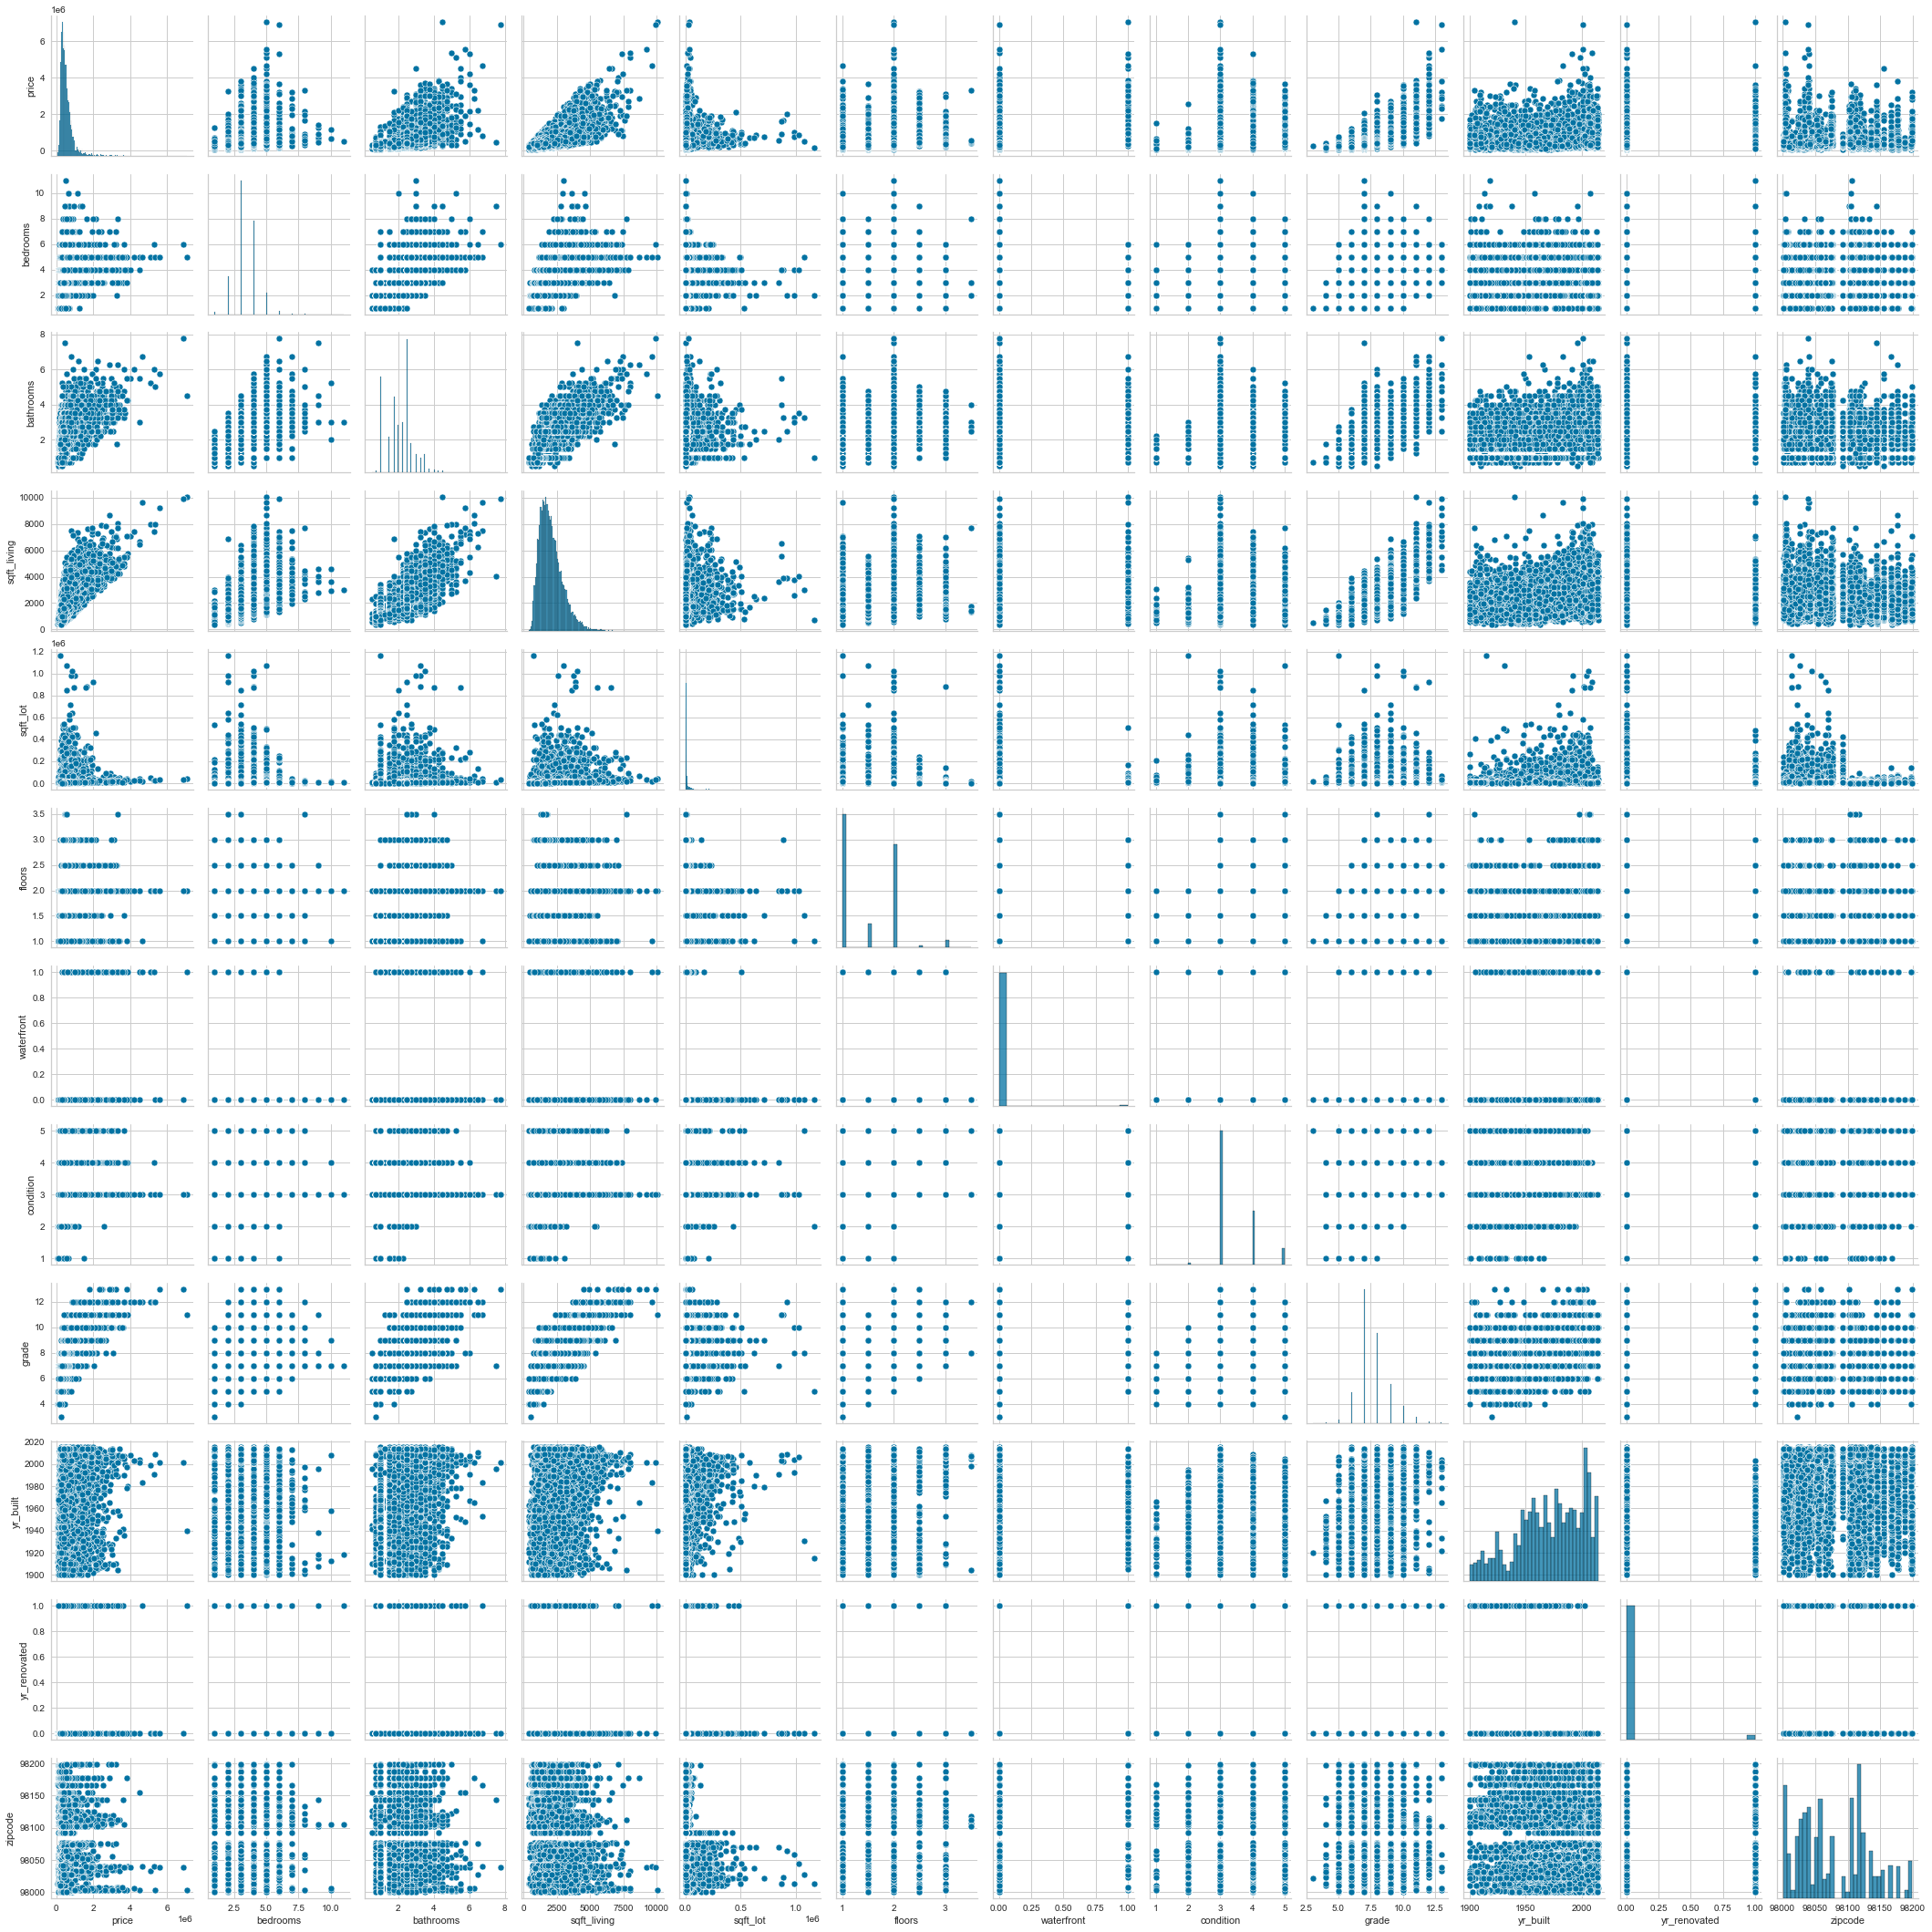

In [48]:
sns.pairplot(df)

## Splitting Data into Train and Test Sets

In [49]:
X = df.drop('price', axis = 1)
y = df.price

In [50]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.00,0.00,3,7,1955,0.00,98178
1,3,2.25,2570,7242,2.00,0.00,3,7,1951,1.00,98125
2,2,1.00,770,10000,1.00,0.00,3,6,1933,0.00,98028
3,4,3.00,1960,5000,1.00,0.00,5,7,1965,0.00,98136
4,3,2.00,1680,8080,1.00,0.00,3,8,1987,0.00,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.00,0.00,3,8,2009,0.00,98103
21593,4,2.50,2310,5813,2.00,0.00,3,8,2014,0.00,98146
21594,2,0.75,1020,1350,2.00,0.00,3,7,2009,0.00,98144
21595,3,2.50,1600,2388,2.00,0.00,3,8,2004,0.00,98027


In [51]:
y.head()

0   221,900.00
1   538,000.00
2   180,000.00
3   604,000.00
4   510,000.00
Name: price, dtype: float64

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
train_X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
6243,4,2.00,1440,4855,2.00,0.00,4,7,1972,0.00,98144
12403,2,0.75,650,5360,1.00,0.00,4,5,1931,0.00,98133
7224,4,2.50,2420,18480,1.00,0.00,4,9,1967,0.00,98004
10154,3,2.25,1990,7340,2.00,0.00,3,8,1984,0.00,98072
11575,3,1.00,1250,21303,1.00,0.00,3,6,1970,0.00,98053


In [54]:
test_X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
8021,3,2.50,3590,8400,1.00,0.00,3,9,1958,1.00,98005
10246,3,1.00,1510,6083,1.00,0.00,4,6,1940,0.00,98115
4035,3,2.00,1320,1297,3.00,0.00,3,7,1995,0.00,98117
21488,2,2.75,2700,8572,1.00,0.00,3,9,2007,0.00,98053
5702,2,2.00,1370,5756,1.00,0.00,3,8,1986,0.00,98034


## Model 1

In [55]:
scaler = StandardScaler()
train_X_nocat = train_X.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)
test_X_nocat = test_X.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)

In [56]:
scaled_train_X = scaler.fit_transform(train_X_nocat)
scaled_test_X = scaler.transform(test_X_nocat)

In [57]:
LinReg = LinearRegression()
LinReg.fit(scaled_train_X, train_y)

LinearRegression()

In [58]:
# m1 stands for 'Model 1'
train_y_m1 = LinReg.predict(scaled_train_X)
test_y_m1 = LinReg.predict(scaled_test_X)

In [59]:
print('Coefficients: ', list(zip(train_X.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m1))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m1))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m1))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m1))

Coefficients:  [('bedrooms', -69524.3953470076), ('bathrooms', 51028.21860858865), ('sqft_living', 285055.2576004785), ('sqft_lot', -13348.34704087653), ('floors', 30779.409976967487), ('waterfront', -100290.56888708472)]
Intercept:  541585.7069005439
------
R2 Train:  0.5562605384168879
MAE Train:  161345.17584133227
--------
R2 Test:  0.552825637805406
MAE Test:  154660.04926928677


- R2 of both sets appear to be similar, however the value is quite low
- The mean absolute error is quite high, will have to lower

In [60]:
pd.DataFrame(train_X).corr(method='pearson')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
bedrooms,1.00,0.53,0.59,0.02,0.18,-0.00,0.02,0.36,0.16,0.02,-0.15
bathrooms,0.53,1.00,0.75,0.09,0.50,0.06,-0.13,0.67,0.51,0.04,-0.20
sqft_living,0.59,0.75,1.00,0.18,0.35,0.11,-0.06,0.76,0.32,0.05,-0.20
sqft_lot,0.02,0.09,0.18,1.00,-0.00,0.02,-0.02,0.13,0.07,-0.00,-0.13
floors,0.18,0.50,0.35,-0.00,1.00,0.02,-0.26,0.46,0.49,0.00,-0.06
waterfront,-0.00,0.06,0.11,0.02,0.02,1.00,0.02,0.09,-0.02,0.07,0.03
condition,0.02,-0.13,-0.06,-0.02,-0.26,0.02,1.00,-0.15,-0.36,-0.06,0.01
grade,0.36,0.67,0.76,0.13,0.46,0.09,-0.15,1.00,0.45,0.02,-0.19
yr_built,0.16,0.51,0.32,0.07,0.49,-0.02,-0.36,0.45,1.00,-0.20,-0.35
yr_renovated,0.02,0.04,0.05,-0.00,0.00,0.07,-0.06,0.02,-0.20,1.00,0.06


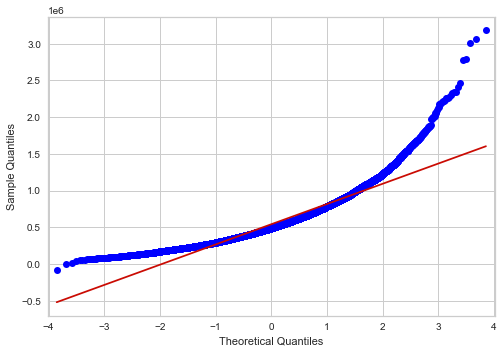

In [61]:
sm.qqplot(train_y_m1, line = 's')
pylab.show()

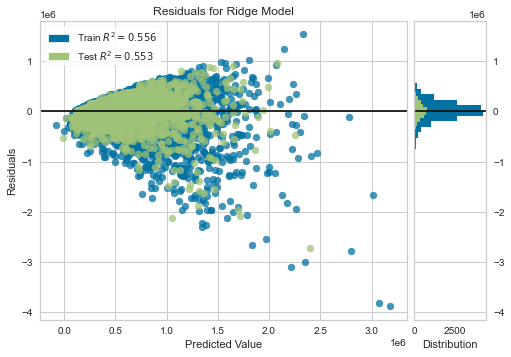

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [62]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(scaled_train_X, train_y)  
visualizer.score(scaled_test_X, test_y) 
visualizer.show()

The model is showing to have outliers on both ends. I need normalize the independent variables more, and address further outliers. The data, as seen in the pairplots are heavily skewed.

## Hot Encoding Categorical Variables

In [63]:
df.info()
# I will be represent columns 'condition', 'grade', 'waterfront', 'yr_renovated' from categorical values
# to dummy numerical variables by using one-hot encoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21593 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21593 non-null  float64
 1   bedrooms      21593 non-null  int64  
 2   bathrooms     21593 non-null  float64
 3   sqft_living   21593 non-null  int64  
 4   sqft_lot      21593 non-null  int64  
 5   floors        21593 non-null  float64
 6   waterfront    21593 non-null  float64
 7   condition     21593 non-null  int64  
 8   grade         21593 non-null  int64  
 9   yr_built      21593 non-null  int64  
 10  yr_renovated  21593 non-null  float64
 11  zipcode       21593 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


In [64]:
def boxit(DataFrame, independent, dependent):
    """ Returns boxplot of chosen independent column and dependent column.
        
        Parameters:
        DataFrame: A Pandas DataFrame
        Independent: Column or feature from dataframe to be chosen as the predictor variable
        Dependent: Column to be predicted
        """
    ax = sns.boxplot(data = DataFrame, x = independent, y = dependent)
    return

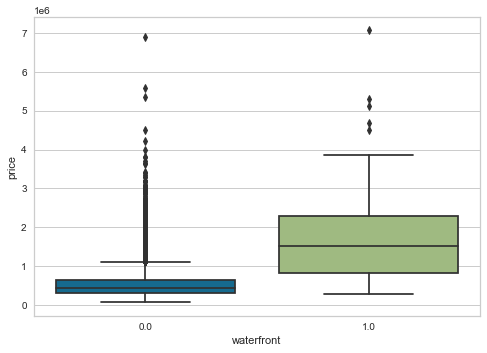

In [65]:
boxit(df, 'waterfront', 'price')

# The interquartile range of waterfront properties (marked as 1.0 on boxplot) is larger thus 
# the range of price for the middle half of waterfront properties is also larger

# The upper quartile of waterfront properties is more expensive while its lower quartile is 
# around the same price as the upper quartile of non-waterfront properties

# Both maximum and minimum values (denoted by the boxplot's whiskers) are higher respectively 
# for waterfront properties

# Non-waterfront properties have extreme outliers

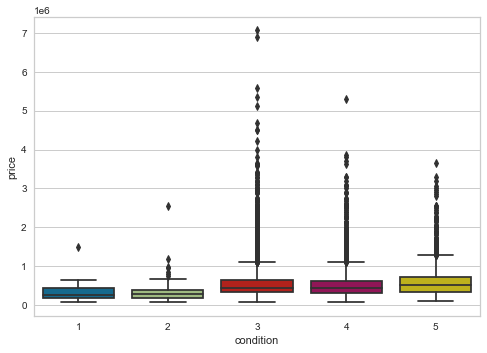

In [66]:
boxit(df, 'condition', 'price')

# Properties' condition don't appear to show high correlation with price, with each condition
# posting relatively similar price ranges. 

# It does appear that outliers peak at condition-3 

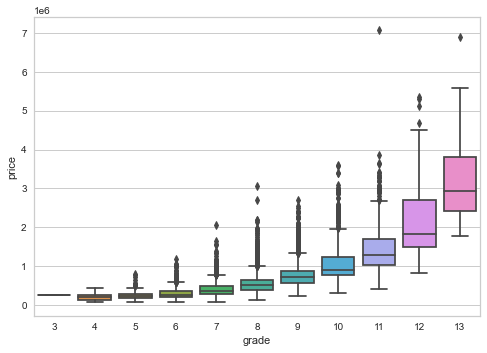

In [67]:
boxit(df, 'grade', 'price')

# There is a rising pattern in prices as the grade of properties go up, this can certainly 
# be an indicator of a linear relationship between property grade and price. 

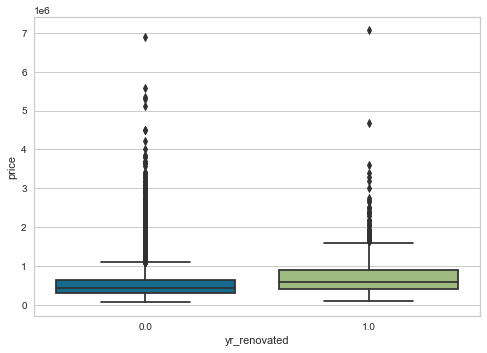

In [68]:
boxit(df, 'yr_renovated', 'price')

In [69]:
def cat(df, cat_data):
    """Turns desired features of dataframe into categorical data.
    
        Parameters:
        df(DataFrame): Pandas DataFrame from which to pull columns
        cat_data(list): list object that specifies column names"""
    for feature in list(df.columns):
        if feature in cat_data:
            df[feature] = df[feature].astype('category')
    return

In [70]:
print(pd.unique(df['condition']))
print(pd.unique(df['grade']))
print(pd.unique(df['waterfront']))
print(pd.unique(df['yr_renovated']))

[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
[0. 1.]
[0. 1.]


In [71]:
categories = ['condition', 'grade', 'waterfront', 'yr_renovated']
# Listing which columns I would like to run through my cat function

cat(train_X, categories)
cat(test_X, categories)
# Running train and test independent variables through cat

one_hot_train = pd.get_dummies(train_X[categories], drop_first = True )
one_hot_test =  pd.get_dummies(test_X[categories], drop_first = False )
# Getting dummy variables through the columns listed in the variable categories

<ipython-input-69-8930f02baede>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category')


In [72]:
#one_hot_train['price'] = 

In [73]:
one_hot_train

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,waterfront_1.0,yr_renovated_1.0
6243,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
12403,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7224,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10154,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11575,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21579,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5391,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
860,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [74]:
one_hot_test.drop(['condition_1', 'waterfront_0.0', 'yr_renovated_0.0'], axis = 1, inplace = True)

In [75]:
#one_hot_test['price'] = df.price

In [76]:
one_hot_test

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,waterfront_1.0,yr_renovated_1.0
8021,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10246,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4035,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21488,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5702,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
20207,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8425,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
17601,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Model 2

In [77]:
LinReg.fit(one_hot_train, train_y)

LinearRegression()

In [78]:
train_y_m2 = LinReg.predict(one_hot_train)
test_y_m2 = LinReg.predict(one_hot_test)

In [79]:
print('R2 Train: ', r2_score(train_y, train_y_m2))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m2))
print('------')
print('R2 Train: ', r2_score(test_y, test_y_m2))
print('MAE Train: ', mean_absolute_error(test_y, test_y_m2))

R2 Train:  0.5796713450890913
MAE Train:  157032.120879267
------
R2 Train:  0.5850926093089304
MAE Train:  152777.49147466072


- The model is underfitting to the data. 
- The mean absolute error has also risen in comparison to the model without categorical variables

In [80]:
pd.DataFrame(one_hot_train).corr(method='pearson')

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,waterfront_1.0,yr_renovated_1.0
condition_2,1.00,-0.12,-0.05,-0.03,0.07,0.06,0.07,0.01,-0.04,-0.03,-0.02,-0.01,-0.01,-0.00,0.00,-0.01
condition_3,-0.12,1.00,-0.81,-0.40,-0.01,-0.05,-0.09,-0.12,0.07,0.10,0.08,0.05,0.02,0.01,-0.02,0.07
condition_4,-0.05,-0.81,1.00,-0.17,0.01,0.02,0.05,0.10,-0.05,-0.08,-0.07,-0.03,-0.02,-0.01,0.01,-0.05
condition_5,-0.03,-0.40,-0.17,1.00,-0.01,0.03,0.05,0.05,-0.04,-0.04,-0.03,-0.03,-0.01,-0.01,0.01,-0.03
grade_4,0.07,-0.01,0.01,-0.01,1.00,-0.00,-0.01,-0.03,-0.02,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01
grade_5,0.06,-0.05,0.02,0.03,-0.00,1.00,-0.03,-0.09,-0.07,-0.04,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01
grade_6,0.07,-0.09,0.05,0.05,-0.01,-0.03,1.00,-0.27,-0.20,-0.12,-0.08,-0.04,-0.02,-0.01,-0.00,0.00
grade_7,0.01,-0.12,0.10,0.05,-0.03,-0.09,-0.27,1.00,-0.53,-0.31,-0.20,-0.11,-0.05,-0.02,-0.05,-0.02
grade_8,-0.04,0.07,-0.05,-0.04,-0.02,-0.07,-0.20,-0.53,1.00,-0.24,-0.15,-0.08,-0.04,-0.02,-0.01,0.01
grade_9,-0.03,0.10,-0.08,-0.04,-0.01,-0.04,-0.12,-0.31,-0.24,1.00,-0.09,-0.05,-0.02,-0.01,0.01,0.02


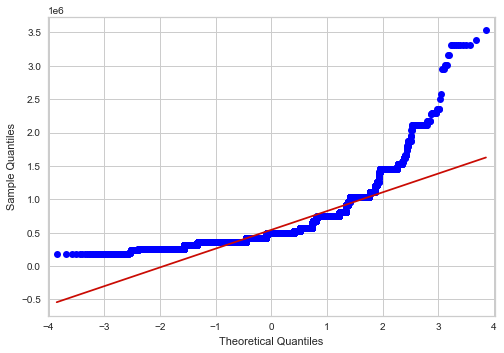

In [81]:
sm.qqplot(train_y_m2, line = 's')
pylab.show()

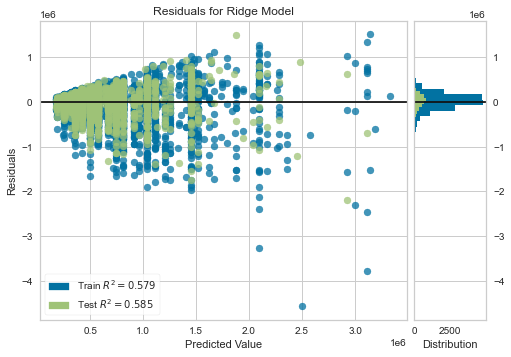

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [82]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(one_hot_train, train_y)  
visualizer.score(one_hot_test, test_y) 
visualizer.show()

I will have to address the outliers in these features as well. My next model will clean outliers and transform my continuous variables to take in logs. 

## Log Transformations

In [83]:
train_X_nocat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17274 entries, 6243 to 15798
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     17274 non-null  int64  
 1   bathrooms    17274 non-null  float64
 2   sqft_living  17274 non-null  int64  
 3   sqft_lot     17274 non-null  int64  
 4   floors       17274 non-null  float64
 5   yr_built     17274 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 944.7 KB


In [84]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [85]:
for variable in variables:
    train_X_nocat[variable] = train_X_nocat[variable].map(lambda x: np.log(x))

In [86]:
train_X_nocat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
6243,1.39,0.69,7.27,8.49,0.69,7.59
12403,0.69,-0.29,6.48,8.59,0.00,7.57
7224,1.39,0.92,7.79,9.82,0.00,7.58
10154,1.10,0.81,7.60,8.90,0.69,7.59
11575,1.10,0.00,7.13,9.97,0.00,7.59
...,...,...,...,...,...,...
11966,1.79,1.50,8.29,8.92,0.69,7.59
21579,0.69,0.81,7.33,6.89,1.10,7.60
5391,1.79,0.56,7.98,8.52,0.92,7.55
860,0.00,-0.29,5.94,9.62,0.00,7.58


In [87]:
for variable in variables:
    test_X_nocat[variable] = test_X_nocat[variable].map(lambda x: np.log(x))

In [88]:
test_X_nocat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
8021,1.10,0.92,8.19,9.04,0.00,7.58
10246,1.10,0.00,7.32,8.71,0.00,7.57
4035,1.10,0.69,7.19,7.17,1.10,7.60
21488,0.69,1.01,7.90,9.06,0.00,7.60
5702,0.69,0.69,7.22,8.66,0.00,7.59
...,...,...,...,...,...,...
2523,1.61,0.92,7.44,9.18,0.69,7.59
20207,1.10,0.92,7.98,8.71,0.69,7.60
8425,1.10,0.56,7.26,8.98,0.00,7.58
17601,1.10,0.92,7.60,8.93,0.69,7.60


In [89]:
train_X_nocat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
6243,1.39,0.69,7.27,8.49,0.69,7.59
12403,0.69,-0.29,6.48,8.59,0.00,7.57
7224,1.39,0.92,7.79,9.82,0.00,7.58
10154,1.10,0.81,7.60,8.90,0.69,7.59
11575,1.10,0.00,7.13,9.97,0.00,7.59
...,...,...,...,...,...,...
11966,1.79,1.50,8.29,8.92,0.69,7.59
21579,0.69,0.81,7.33,6.89,1.10,7.60
5391,1.79,0.56,7.98,8.52,0.92,7.55
860,0.00,-0.29,5.94,9.62,0.00,7.58


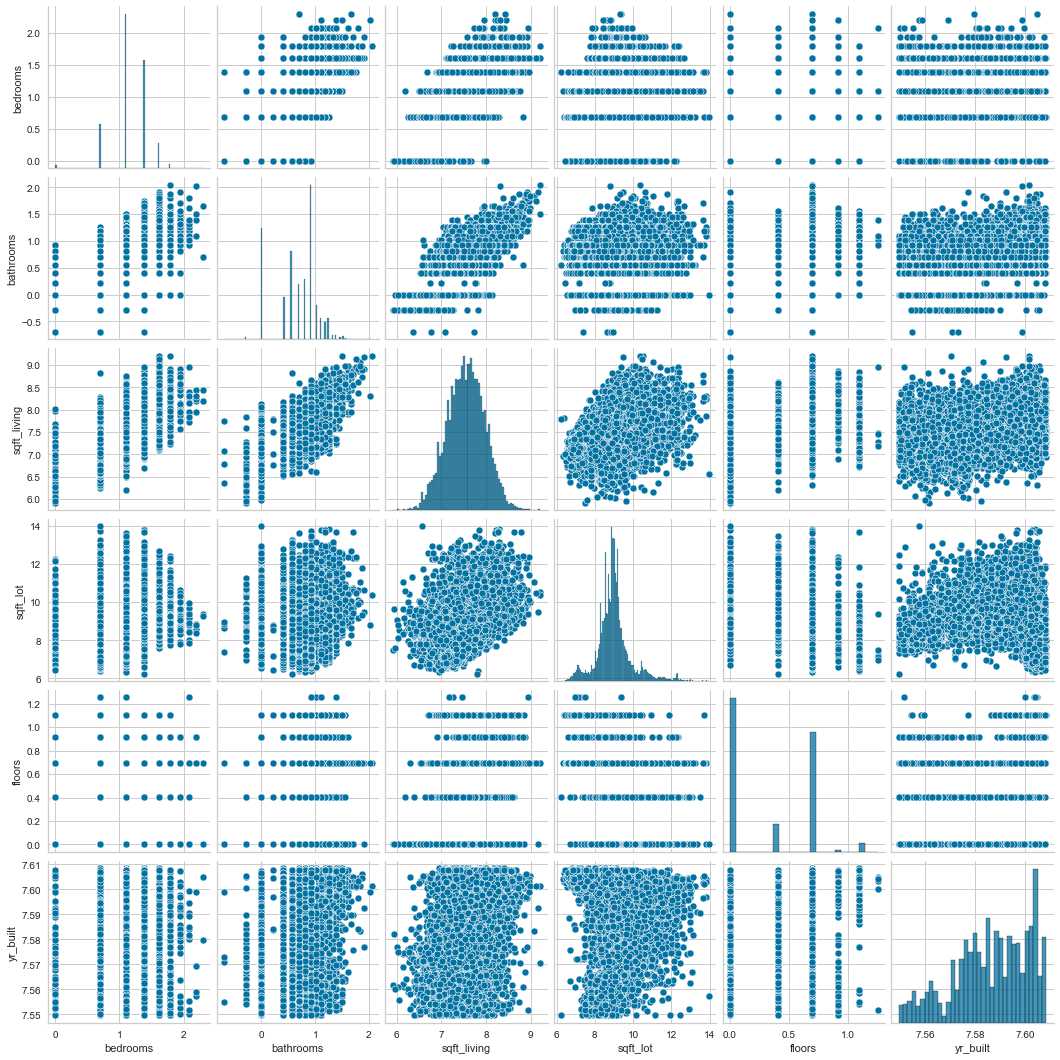

In [90]:
sns.pairplot(train_X_nocat)

## Model 3

In [91]:
train_X_nocat.drop('yr_built', axis = 1, inplace = True)

In [92]:
test_X_nocat.drop('yr_built', axis = 1, inplace = True)

In [93]:
scaled_train_X = scaler.fit_transform(train_X_nocat)
scaled_test_X = scaler.transform(test_X_nocat)

In [94]:
LinReg.fit(scaled_train_X, train_y)

LinearRegression()

In [95]:
train_y_m3 = LinReg.predict(scaled_train_X)
test_y_m3 = LinReg.predict(scaled_test_X)

In [96]:
print('Coefficients: ', list(zip(train_X_nocat.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m3))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m3))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m3))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m3))

Coefficients:  [('bedrooms', -63011.97870144687), ('bathrooms', -11536.174975553586), ('sqft_living', 279056.0557006086), ('sqft_lot', -17474.72351482904), ('floors', 4603.088977718413)]
Intercept:  541585.706900544
------
R2 Train:  0.39128873107402773
MAE Train:  185005.5386276318
--------
R2 Test:  0.41242034324155985
MAE Test:  177760.07649033403


In [97]:
pd.DataFrame(train_X_nocat).corr(method='pearson')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
bedrooms,1.00,0.53,0.65,0.19,0.21
bathrooms,0.53,1.00,0.76,0.08,0.51
sqft_living,0.65,0.76,1.00,0.33,0.39
sqft_lot,0.19,0.08,0.33,1.00,-0.22
floors,0.21,0.51,0.39,-0.22,1.00


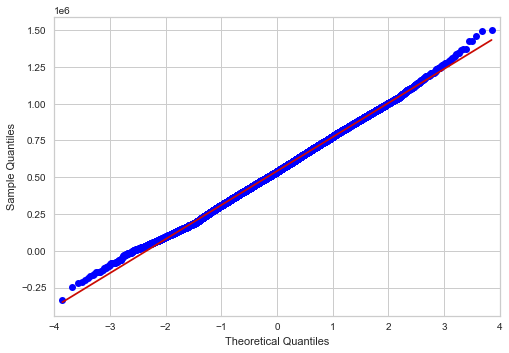

In [98]:
sm.qqplot(train_y_m3, line = 's')
pylab.show()

In [99]:
train_X_nocat.shape

(17274, 5)

In [100]:
test_X_nocat.shape

(4319, 5)

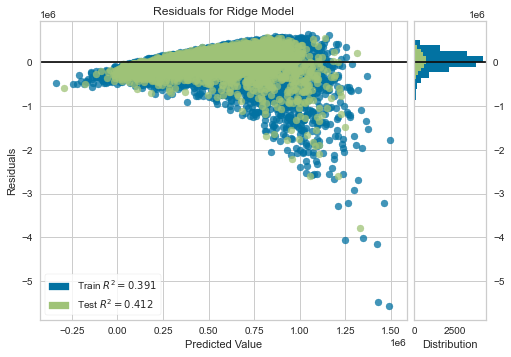

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [101]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(train_X_nocat, train_y)  
visualizer.score(test_X_nocat, test_y) 
visualizer.show()

## Outliers

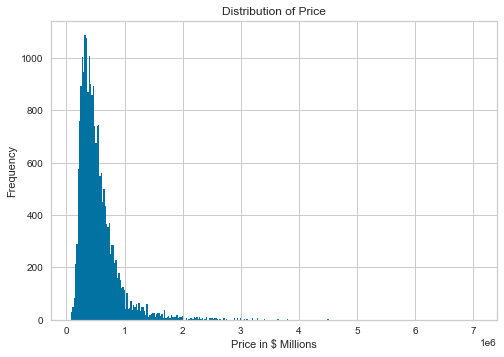

In [102]:
plt.hist(df.price, bins = 'auto');
plt.xlabel('Price in $ Millions')
plt.ylabel('Frequency')
plt.title('Distribution of Price');

# There are quite a lot of outliers in terms of the price. Because our goal is to ultimately buy properties,
# renovate them and resell them; the houses which are priced two standard deviations above the mean would 

In [103]:
df = df.loc[df.price <= (df.price.mean() + (2 * df.price.std()))]


In [104]:
df.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
df_price = df.loc[df.price <= (df.price.mean() + (2 * df.price.std()))]

In [106]:
price_no_outlier = df_price.price

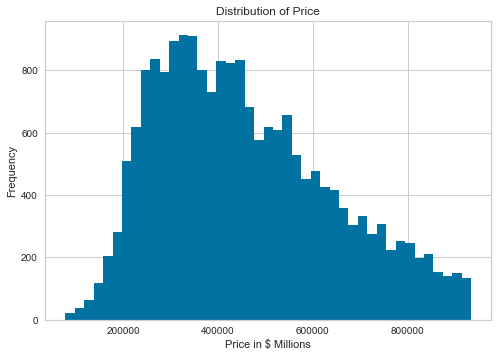

In [107]:
plt.hist(price_no_outlier, bins = 'auto');
plt.xlabel('Price in $ Millions')
plt.ylabel('Frequency')
plt.title('Distribution of Price');


In [108]:
X = df.drop(['yr_built'], axis=1)
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

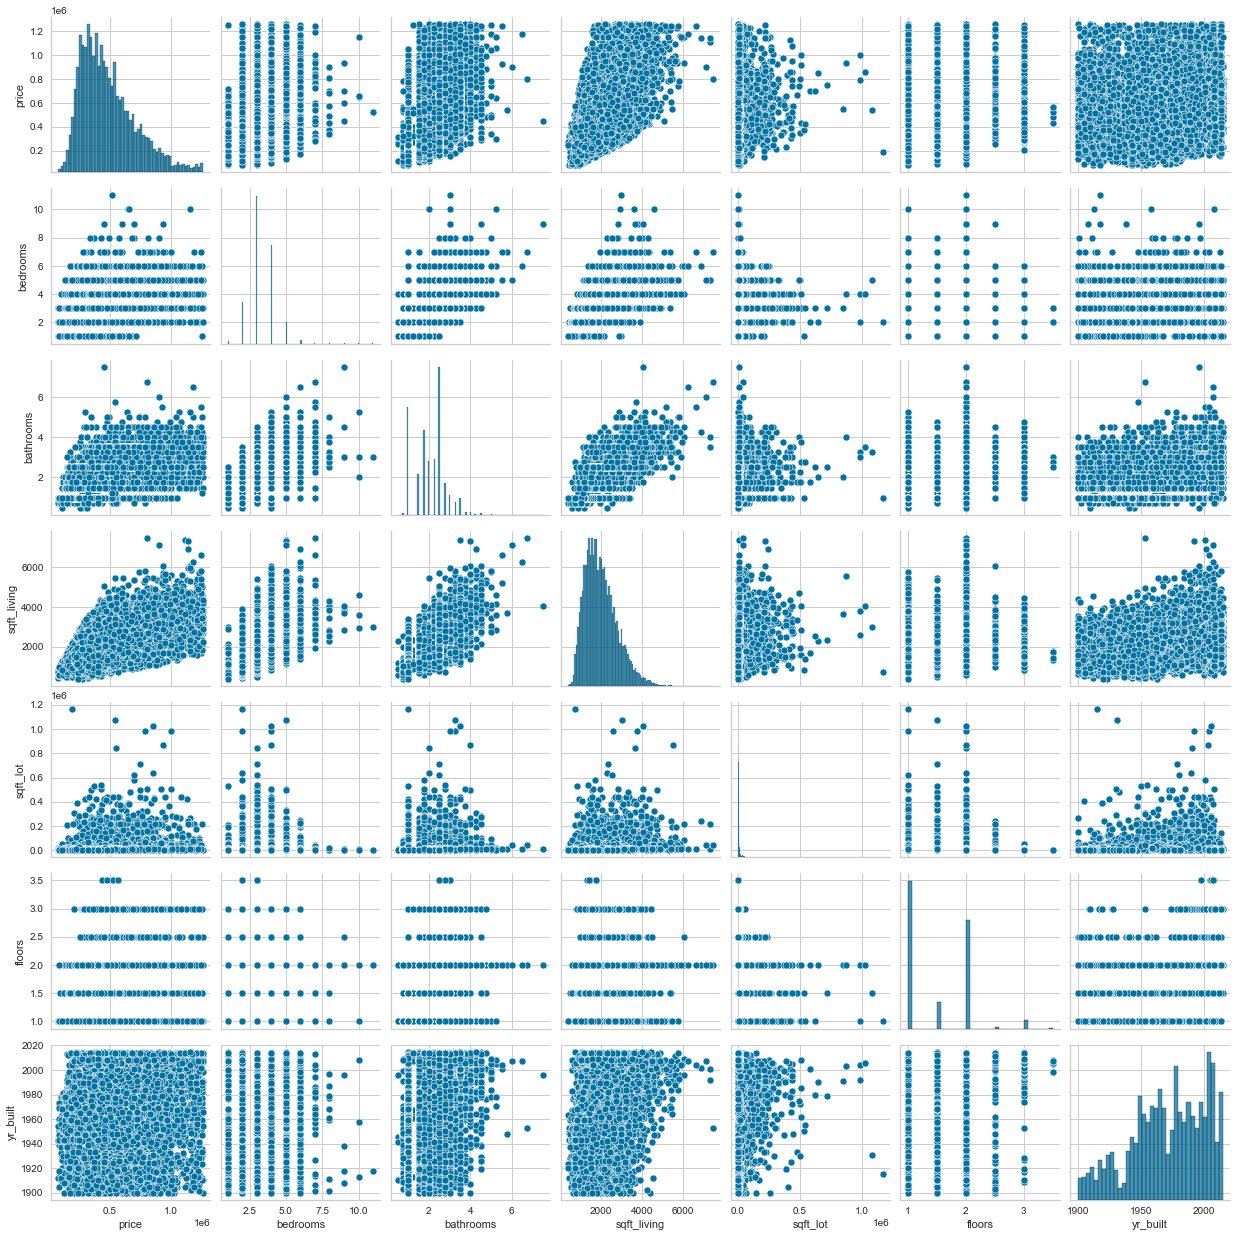

In [109]:
sns.pairplot(df)

## Model 4

In [110]:
scaled_train_X_new = scaler.fit_transform(X_train)
scaled_test_X_new = scaler.transform(X_test)

LinReg.fit(scaled_train_X_new, y_train)

train_y_m4 = LinReg.predict(scaled_train_X_new)
test_y_m4 = LinReg.predict(scaled_test_X_new)

In [111]:
print('Coefficients: ', list(zip(train_X_nocat.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(y_train, train_y_m4))
print('MAE Train: ', mean_absolute_error(y_train, train_y_m4))
print('--------')
print('R2 Test: ', r2_score(y_test, test_y_m4))
print('MAE Test: ', mean_absolute_error(y_test, test_y_m4))

Coefficients:  [('bedrooms', array([2.23789414e+05, 7.71035304e-11, 2.68884970e-11, 8.84635110e-11,
       2.58022438e-11, 7.28405243e-12]))]
Intercept:  [486347.50150675]
------
R2 Train:  1.0
MAE Train:  1.3388077745963114e-10
--------
R2 Test:  1.0
MAE Test:  1.3785729527818317e-10


In [112]:
pd.DataFrame(X_train).corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
price,1.00,0.31,0.47,0.64,0.10,0.27
bedrooms,0.31,1.00,0.51,0.60,0.03,0.16
bathrooms,0.47,0.51,1.00,0.72,0.08,0.50
sqft_living,0.64,0.60,0.72,1.00,0.18,0.34
sqft_lot,0.10,0.03,0.08,0.18,1.00,-0.02
floors,0.27,0.16,0.50,0.34,-0.02,1.00


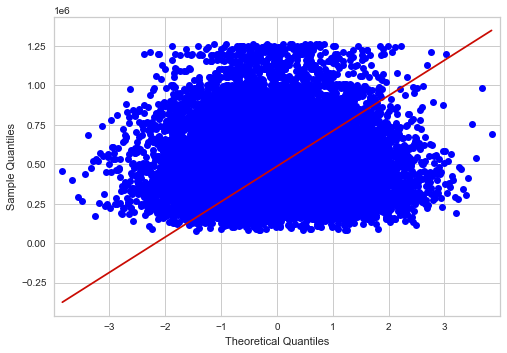

In [113]:
sm.qqplot(train_y_m4, line = 's')
pylab.show()

## Model 5

In [114]:
data = pd.read_csv('kc_house_data.csv')

In [115]:
to_drop = ['id', 'view', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'date', 'yr_built' ]

In [116]:
data.drop(to_drop, axis = 1, inplace = True)

In [117]:
data.waterfront.fillna(0.0, inplace = True)
data.yr_renovated.fillna(value = 0, inplace = True)
data.loc[(data.yr_renovated > 0), 'yr_renovated'] = 1
bedroom_outlier = data.loc[data['bedrooms'] == 33].index
data.drop(bedroom_outlier, axis = 0,  inplace = True)
price_outlier = data.loc[data['price'] == data.price.max()].index
data.drop(price_outlier, axis = 0,  inplace = True)
sqft_lot_outlier = data.loc[data['sqft_lot'] == data.sqft_lot.max()].index
data.drop(sqft_lot_outlier, axis = 0,  inplace = True)
bathrooms_outlier = data.loc[data['bathrooms'] == data.bathrooms.max()].index
data.drop(bathrooms_outlier, axis = 0,  inplace = True)

In [118]:
data = data.loc[data.price <= (data.price.mean() + (2 * data.price.std()))]

In [119]:
X_ = data.drop('price', axis = 1)
y_ = data.price
X_Train, X_Test, y_Train, y_Test = train_test_split(X_, y_, test_size = 0.2, random_state = 42)

In [120]:
categories = ['condition', 'grade', 'waterfront', 'yr_renovated']
# Listing which columns I would like to run through my cat function

cat(X_Train, categories)
cat(X_Test, categories)
# Running train and test independent variables through cat

dummy_train = pd.get_dummies(X_Train[categories], drop_first = True )
dummy_test =  pd.get_dummies(X_Test[categories], drop_first = False )
dummy_test.drop(['condition_1', 'waterfront_0.0', 'yr_renovated_0.0'],
                   axis = 1, inplace = True)

<ipython-input-69-8930f02baede>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category')


In [121]:
X_Train = X_Train.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)
X_Test = X_Test.drop(['yr_renovated', 'waterfront', 'condition', 'grade', 'zipcode'], axis = 1)

### New Feature

In [122]:
Sqft_Bed_Train = X_Train.sqft_living / X_Train.bedrooms
Sqft_Bed_Test = X_Test.sqft_living / X_Test.bedrooms

In [123]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
for feature in variables:
    X_Train[feature] = X_Train[feature].map(lambda x: np.log(x))
for feature in variables:
    X_Test[feature] = X_Test[feature].map(lambda x: np.log(x))

In [124]:
X_Train = X_Train.join(dummy_train)

In [125]:
X_Test = X_Test.join(dummy_test)

In [126]:
SS = StandardScaler()
X_Train_Scaled = SS.fit_transform(X_Train)
X_Test_Scaled = SS.transform(X_Test)

In [127]:
regression = LinearRegression()
regression.fit(X_Train_Scaled, y_train)

LinearRegression()

In [128]:
train_y_m5 = regression.predict(X_Train_Scaled)
test_y_m5 = regression.predict(X_Test_Scaled)

In [129]:
print('Coefficients: ', X_Train.columns, regression.coef_)
print('Intercept: ', regression.intercept_)
print('------')
print('R2 Train: ', r2_score(y_train, train_y_m5))
print('MAE Train: ', mean_absolute_error(y_train, train_y_m5))
print('--------')
print('R2 Test: ', r2_score(y_Test, test_y_m5))
print('MAE Test: ', mean_absolute_error(y_Test, test_y_m5))

Coefficients:  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'waterfront_1.0', 'yr_renovated_1.0'],
      dtype='object') [[-15448.80364305 -18105.9178347  100280.87618276 -25739.94660245
   -6368.89888623   2178.17566266  10634.68903391  30401.11427399
   35542.24109568    766.86608881  -3839.73501146  -6318.59921416
   13266.99205161  53389.9088463   81820.54370506  75118.35133498
   49227.09444407   9458.20613458  15287.41959487  20065.39954788]]
Intercept:  [486347.50150675]
------
R2 Train:  0.5270359456577862
MAE Train:  119905.40709878887
--------
R2 Test:  0.5225543614282906
MAE Test:  118652.80967262997


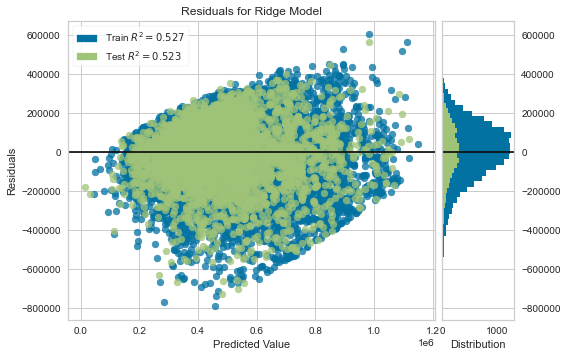

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [130]:
model5 = Ridge()
visualizer = ResidualsPlot(model5)

visualizer.fit(X_Train, y_Train)  
visualizer.score(X_Test, y_Test) 
visualizer.show()

In [131]:
list(X_Train.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'waterfront_1.0',
 'yr_renovated_1.0']

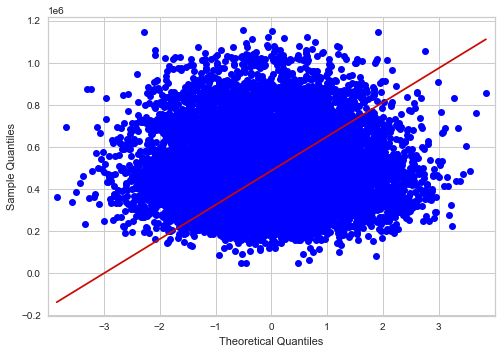

In [132]:
sm.qqplot(train_y_m5, line = 's')
pylab.show()

## Ratio Between Bedrooms and Sqft_Living

In [133]:
X_Train['Sqft_Bed'] = Sqft_Bed_Train
X_Test['Sqft_Bed'] = Sqft_Bed_Test

In [134]:
SS = StandardScaler()
X_Train_Scaled = SS.fit_transform(X_Train)
X_Test_Scaled = SS.transform(X_Test)

In [135]:
regression = LinearRegression()
regression.fit(X_Train_Scaled, y_train)

LinearRegression()